In [7]:
!pip install opencv-python matplotlib pandas seaborn albumentations ultralytics


In [ ]:
import cv2
import matplotlib.pyplot as plt

def plot_image_with_yolo_bbox(img_path, label_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, x, y, bw, bh = map(float, line.split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Example
plot_image_with_yolo_bbox(
    r"dataset\dataset\test\images\190001.jpg",
    r"dataset\dataset\test\labels\190001.txt"
)


[ WARN:0@223.510] global loadsave.cpp:268 findDecoder imread_('dataset\test\images\190001.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import yaml
import os

data_yaml_path = "data.yaml"  # File is in the current directory

# Check if file exists and load it
if os.path.exists(data_yaml_path):
    with open(data_yaml_path, "r") as file:
        data = yaml.safe_load(file)
        print("✅ YAML loaded successfully:")
        print(data)
else:
    print("❌ data.yaml not found in:", os.getcwd())


✅ YAML loaded successfully:
{'train': 'dataset/images/train', 'val': 'dataset/images/val', 'test': 'dataset/images/test', 'nc': 1, 'names': ['person']}


In [ ]:
import os

# Corrected paths based on your structure
image_dir = os.path.join("dataset", "dataset", "train", "images")
label_dir = os.path.join("dataset", "dataset", "train", "labels")

# Verify the paths
print("Image directory:", image_dir)
print("Label directory:", label_dir)

# Check if paths exist
if not os.path.exists(image_dir):
    print(f"❌ Image folder not found: {image_dir}")
else:
    print(f"✅ Found image folder at: {image_dir}")

if not os.path.exists(label_dir):
    print(f"❌ Label folder not found: {label_dir}")
else:
    print(f"✅ Found label folder at: {label_dir}")


Image directory: dataset\dataset\train\images
Label directory: dataset\dataset\train\labels
✅ Found image folder at: dataset\dataset\train\images
✅ Found label folder at: dataset\dataset\train\labels


In [ ]:
import os

# Path to the labels folder
label_dir = os.path.join( "dataset", "dataset", "train", "labels")

# Check if the folder exists
if os.path.exists(label_dir):
    print(f"✅ Path exists: {label_dir}")
else:
    print(f"❌ Path does not exist: {label_dir}")


✅ Path exists: dataset\dataset\train\labels


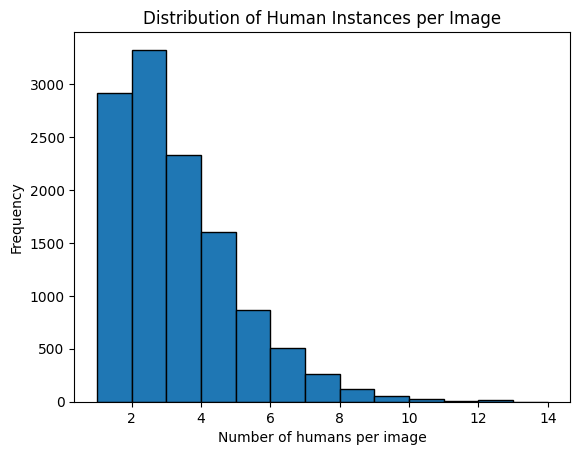

In [ ]:
import os
import matplotlib.pyplot as plt

# Corrected label directory path using os.path.join()
label_dir = os.path.join( "dataset", "dataset", "train", "labels")

# Get all label files (those ending with .txt)
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])

# Initialize list to store counts
counts = []

# Loop over each label file and count the number of bounding boxes (humans)
for label_file in label_files:
    label_path = os.path.join(label_dir, label_file)
    with open(label_path, 'r') as f:
        lines = f.readlines()
        counts.append(len(lines))

# Plot the histogram
plt.hist(counts, bins=range(1, max(counts) + 2), edgecolor='black')
plt.xlabel("Number of humans per image")
plt.ylabel("Frequency")
plt.title("Distribution of Human Instances per Image")
plt.show()


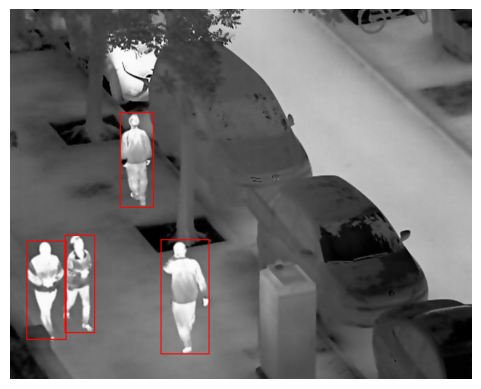

In [ ]:
import cv2
import matplotlib.pyplot as plt

def plot_image_with_yolo_bbox(img_path, label_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, x, y, bw, bh = map(float, line.split())
            x1 = int((x - bw / 2) * w)
            y1 = int((y - bh / 2) * h)
            x2 = int((x + bw / 2) * w)
            y2 = int((y + bh / 2) * h)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    plt.imshow(img)
    plt.axis("off")
    plt.show()

# Example
plot_image_with_yolo_bbox(
    r"dataset\dataset\test\images\190060.jpg",
    r"dataset\dataset\test\labels\190060.txt"
)


In [ ]:
train_images_path = 'dataset/dataset/train/images'
train_labels_path = 'dataset/dataset/train/labels'
test_images_path = 'dataset/dataset/test/images'
test_labels_path = 'dataset/dataset/test/labels'


In [ ]:
import os

img_path = r"Thermal-image-human-detection\dataset\dataset\test\images\190001.jpg"
print("Full Image Path:", os.path.abspath(img_path))


Full Image Path: c:\Users\trish\NUS project\Thermal-image-human-detection\Thermal-image-human-detection\dataset\dataset\test\images\190001.jpg


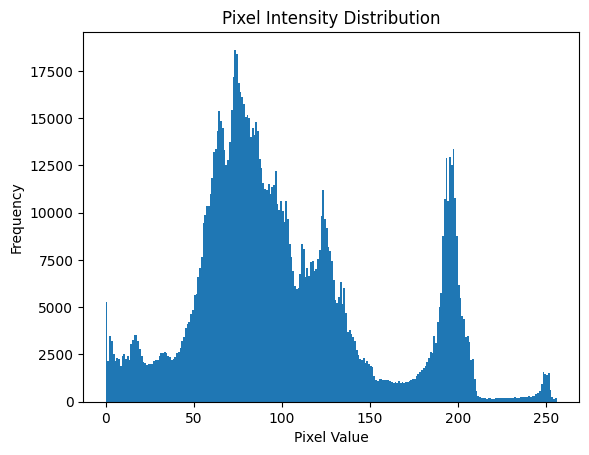

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Corrected file path (with the correct structure)
image_filename = "190001.jpg"  # Example image file, ensure this is the correct name
img_path = os.path.join("dataset", "dataset", "test", "images", image_filename)

# Read image in grayscale
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if img is not None:
    # Plot histogram of pixel intensities
    plt.hist(img.ravel(), bins=256, range=(0, 256))
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()
else:
    print(f"Image {image_filename} not found or failed to load at: {img_path}")


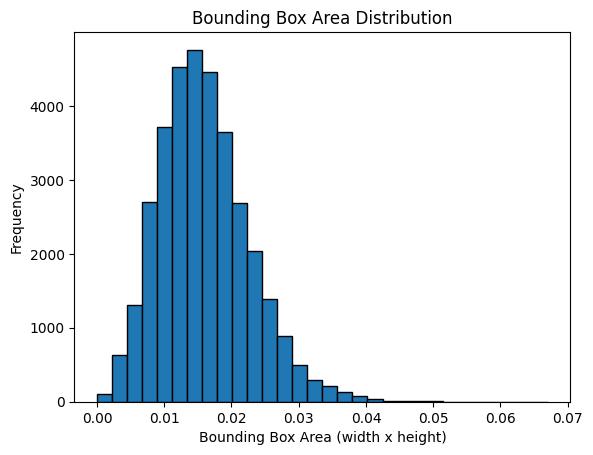

In [ ]:
areas = []
for label_file in label_files:
    with open(os.path.join(label_dir, label_file)) as f:
        lines = f.readlines()
        for line in lines:
            _, x_center, y_center, width, height = map(float, line.strip().split())
            area = width * height
            areas.append(area)

plt.hist(areas, bins=30, edgecolor='black')
plt.title("Bounding Box Area Distribution")
plt.xlabel("Bounding Box Area (width x height)")
plt.ylabel("Frequency")
plt.show()



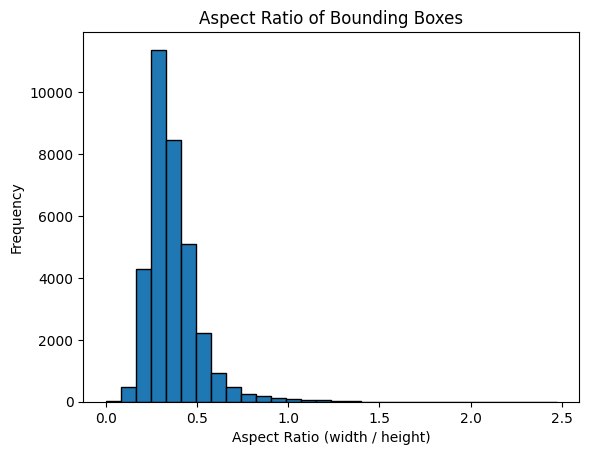

In [ ]:
aspect_ratios = []
for label_file in label_files:
    with open(os.path.join(label_dir, label_file)) as f:
        lines = f.readlines()
        for line in lines:
            _, x_center, y_center, width, height = map(float, line.strip().split())
            aspect_ratio = width / height
            aspect_ratios.append(aspect_ratio)

plt.hist(aspect_ratios, bins=30, edgecolor='black')
plt.title("Aspect Ratio of Bounding Boxes")
plt.xlabel("Aspect Ratio (width / height)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
img_dir = os.path.join( "dataset", "dataset", "train", "images")

# Get all label files (those ending with .txt)
img_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.jpg')])

In [ ]:
!pip install shapely


   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 1.3 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.7 MB 812.7 kB/s eta 0:00:03
   --------- ------------------------------ 0.4/1.7 MB 3.0 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.7 MB 3.5 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.7 MB 5.0 MB/s eta 0:00:01
   ----------------------------------- ---- 1.5/1.7 MB 6.0 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 5.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
img_files = sorted([f for f in os.listdir(img_dir) if f.endswith('.jpg')])
img_files[100]

'010101.jpg'

In [ ]:
def read_yolo_labels(label_path, img_width, img_height):
    boxes = []
    with open(label_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_id, x_center, y_center, w, h = map(float, parts)
            x1 = int((x_center - w/2) * img_width)
            y1 = int((y_center - h/2) * img_height)
            x2 = int((x_center + w/2) * img_width)
            y2 = int((y_center + h/2) * img_height)
            boxes.append((class_id, x1, y1, x2, y2))
    return boxes

def plot_image_with_boxes(img_path, label_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    h, w = img.shape[:2]
    boxes = read_yolo_labels(label_path, w, h)

    for cls, x1, y1, x2, y2 in boxes:
        cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)
    
    plt.figure(figsize=(8,6))
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis('off')
    plt.show()


In [ ]:
from shapely.geometry import box as shapely_box

def compute_iou(box1, box2):
    b1 = shapely_box(*box1)
    b2 = shapely_box(*box2)
    inter = b1.intersection(b2).area
    union = b1.union(b2).area
    return inter / union if union != 0 else 0

def occlusion_stats(image_dir, label_dir, iou_threshold=0.1):
    occluded_count = 0
    total_images = 0

    for filename in os.listdir(label_dir):
        label_path = os.path.join(label_dir, filename)
        image_path = os.path.join(image_dir, filename.replace('.txt', '.jpg'))  # or .png

        img = cv2.imread(image_path)
        if img is None: continue
        h, w = img.shape[:2]
        boxes = read_yolo_labels(label_path, w, h)
        coords = [(x1, y1, x2, y2) for _, x1, y1, x2, y2 in boxes]

        for i in range(len(coords)):
            for j in range(i+1, len(coords)):
                iou = compute_iou(coords[i], coords[j])
                if iou > iou_threshold:
                    occluded_count += 1
                    break
        total_images += 1

    print(f'Occluded humans in {occluded_count} of {total_images} images ({(occluded_count/total_images)*100:.2f}%)')


In [ ]:
import numpy as np
import seaborn as sns
def background_variance(img_path, boxes):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    mask = np.ones(img.shape, dtype=bool)

    for _, x1, y1, x2, y2 in boxes:
        mask[y1:y2, x1:x2] = False

    background_pixels = img[mask]
    return np.var(background_pixels)

def analyze_thermal_noise(image_dir, label_dir, sample_size=100):
    variances = []
    count = 0

    for filename in os.listdir(label_dir):
        label_path = os.path.join(label_dir, filename)
        image_path = os.path.join(image_dir, filename.replace('.txt', '.jpg'))  # or .png

        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue

        h, w = img.shape
        boxes = read_yolo_labels(label_path, w, h)
        var = background_variance(image_path, boxes)
        variances.append(var)

        count += 1
        if count >= sample_size:
            break

    sns.histplot(variances, kde=True)
    plt.title('Background Thermal Noise Variation')
    plt.xlabel('Variance of Background Pixels')
    plt.show()


In [ ]:
import os

label_dir = 'dataset/dataset/train/labels'
image_dir = 'dataset/dataset/train/images'

print("Sample label files:")
print(os.listdir(label_dir)[:5])

print("Sample image files:")
print(os.listdir(image_dir)[:5])


Sample label files:
['010001.txt', '010002.txt', '010003.txt', '010004.txt', '010005.txt']
Sample image files:
['010001.jpg', '010002.jpg', '010003.jpg', '010004.jpg', '010005.jpg']


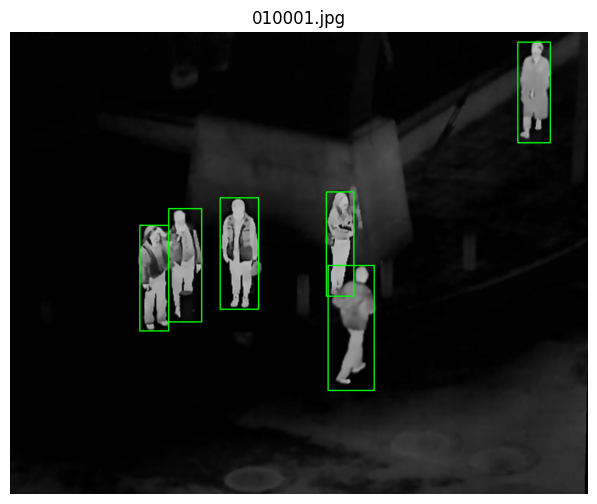

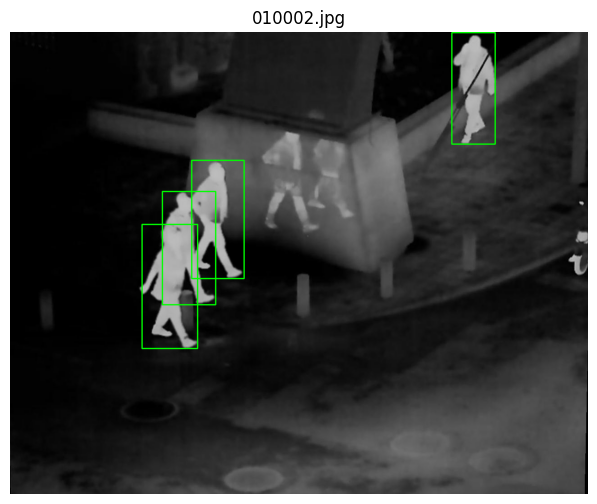

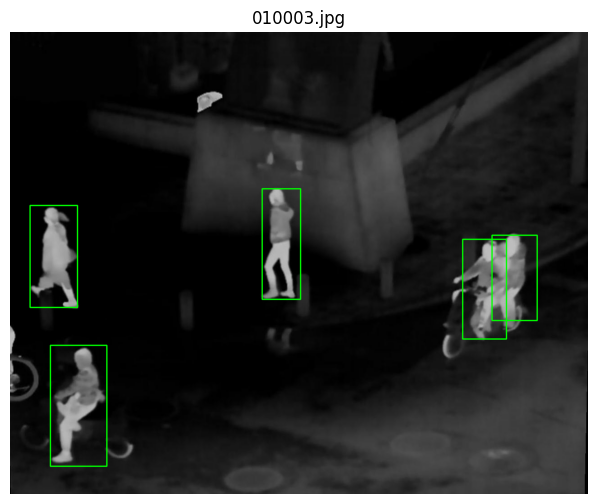

Occluded humans in 3304 of 12023 images (27.48%)


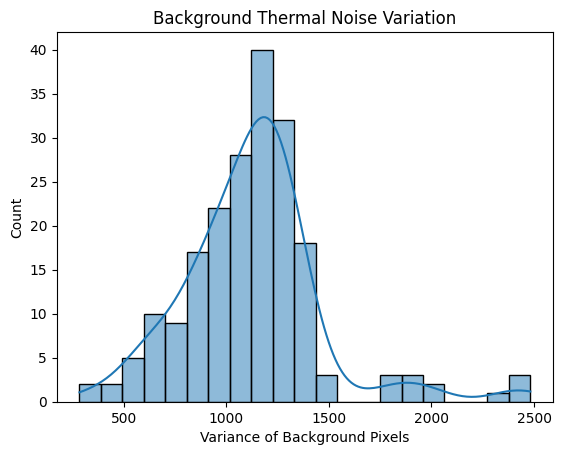

In [ ]:
import os

# Correctly define directories
image_dir = 'dataset/dataset/train/images'
label_dir = 'dataset/dataset/train/labels'

# Get lists of files
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(('.jpg'))])
label_files = sorted([f for f in os.listdir(label_dir) if f.endswith('.txt')])

# Plot a few valid image-label pairs
for i in range(3):  # Plot 3 samples
    img_file = image_files[i]
    label_file = os.path.splitext(img_file)[0] + '.txt'
    
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, label_file)

    if os.path.exists(label_path):
        plot_image_with_boxes(img_path, label_path)
    else:
        print(f"Label file missing for {img_file}, skipping.")

# Run occlusion analysis
occlusion_stats(image_dir, label_dir)

# Run background thermal noise variation analysis
analyze_thermal_noise(image_dir, label_dir, sample_size=200)


In [ ]:
import cv2
import numpy as np
import os

def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union = box1Area + box2Area - interArea
    return interArea / union if union > 0 else 0

def yolo_to_xyxy(yolo_box, img_width, img_height):
    class_id, x_center, y_center, w, h = yolo_box
    x1 = (x_center - w / 2) * img_width
    y1 = (y_center - h / 2) * img_height
    x2 = (x_center + w / 2) * img_width
    y2 = (y_center + h / 2) * img_height
    return [x1, y1, x2, y2]

def occlusion_stats(image_dir, label_dir, iou_thresh=0.3):
    overlap_count = 0
    partial_count = 0
    total_boxes = 0

    for img_file in os.listdir(image_dir):
        if not img_file.endswith(('.jpg', '.png')):
            continue

        label_file = os.path.splitext(img_file)[0] + '.txt'
        label_path = os.path.join(label_dir, label_file)
        img_path = os.path.join(image_dir, img_file)

        if not os.path.exists(label_path):
            continue

        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        with open(label_path, 'r') as f:
            yolo_boxes = [list(map(float, line.strip().split())) for line in f]

        boxes = [yolo_to_xyxy(b, w, h) for b in yolo_boxes]
        total_boxes += len(boxes)

        # Check for overlaps
        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            # Check partial visibility (touching image edges)
            if x1 <= 1 or y1 <= 1 or x2 >= w - 1 or y2 >= h - 1:
                partial_count += 1
            for j in range(i + 1, len(boxes)):
                iou = compute_iou(boxes[i], boxes[j])
                if iou > iou_thresh:
                    overlap_count += 1

    print(f"Total bounding boxes: {total_boxes}")
    print(f"Overlapping pairs (possible occlusion): {overlap_count}")
    print(f"Partially visible boxes (cut off at edges): {partial_count}")


In [ ]:
occlusion_stats(image_dir, label_dir)


Total bounding boxes: 34135
Overlapping pairs (possible occlusion): 838
Partially visible boxes (cut off at edges): 4937


In [ ]:
import matplotlib.pyplot as plt
import cv2

def visualize_occlusions(img_path, label_path, iou_thresh=0.3):
    img = cv2.imread(img_path)
    h, w = img.shape[:2]

    with open(label_path, 'r') as f:
        yolo_boxes = [list(map(float, line.strip().split())) for line in f]

    boxes = [yolo_to_xyxy(b, w, h) for b in yolo_boxes]
    overlapped_indices = set()
    partial_indices = set()

    # Detect overlapping pairs
    for i in range(len(boxes)):
        x1, y1, x2, y2 = boxes[i]
        # Check partial visibility
        if x1 <= 1 or y1 <= 1 or x2 >= w - 1 or y2 >= h - 1:
            partial_indices.add(i)
        for j in range(i + 1, len(boxes)):
            iou = compute_iou(boxes[i], boxes[j])
            if iou > iou_thresh:
                overlapped_indices.update([i, j])

    # Draw bounding boxes
    for idx, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        if idx in overlapped_indices:
            color = (0, 0, 255)  # Red for occlusion
        elif idx in partial_indices:
            color = (0, 255, 255)  # Yellow for partial visibility
        else:
            color = (0, 255, 0)  # Green for normal
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.title("Red: Occluded, Yellow: Partially Visible, Green: Normal")
    plt.axis('off')
    plt.show()


In [ ]:
import random
import os

def visualize_random_occlusion(image_dir, label_dir):
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))]
    while image_files:
        img_file = random.choice(image_files)
        label_file = os.path.splitext(img_file)[0] + '.txt'
        img_path = os.path.join(image_dir, img_file)
        label_path = os.path.join(label_dir, label_file)

        if os.path.exists(label_path):
            print(f"Showing: {img_file}")
            visualize_occlusions(img_path, label_path)
            break
        else:
            # Remove and retry if label not found
            image_files.remove(img_file)


Showing: 060002.jpg


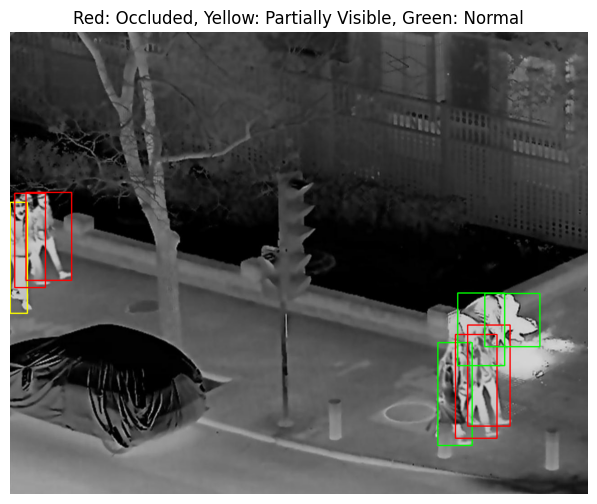

In [ ]:
visualize_random_occlusion(image_dir, label_dir)

Mean: 101.14, Min: 0, Max: 255
Median: 89.0, Q1: 67.0, Q3: 126.0


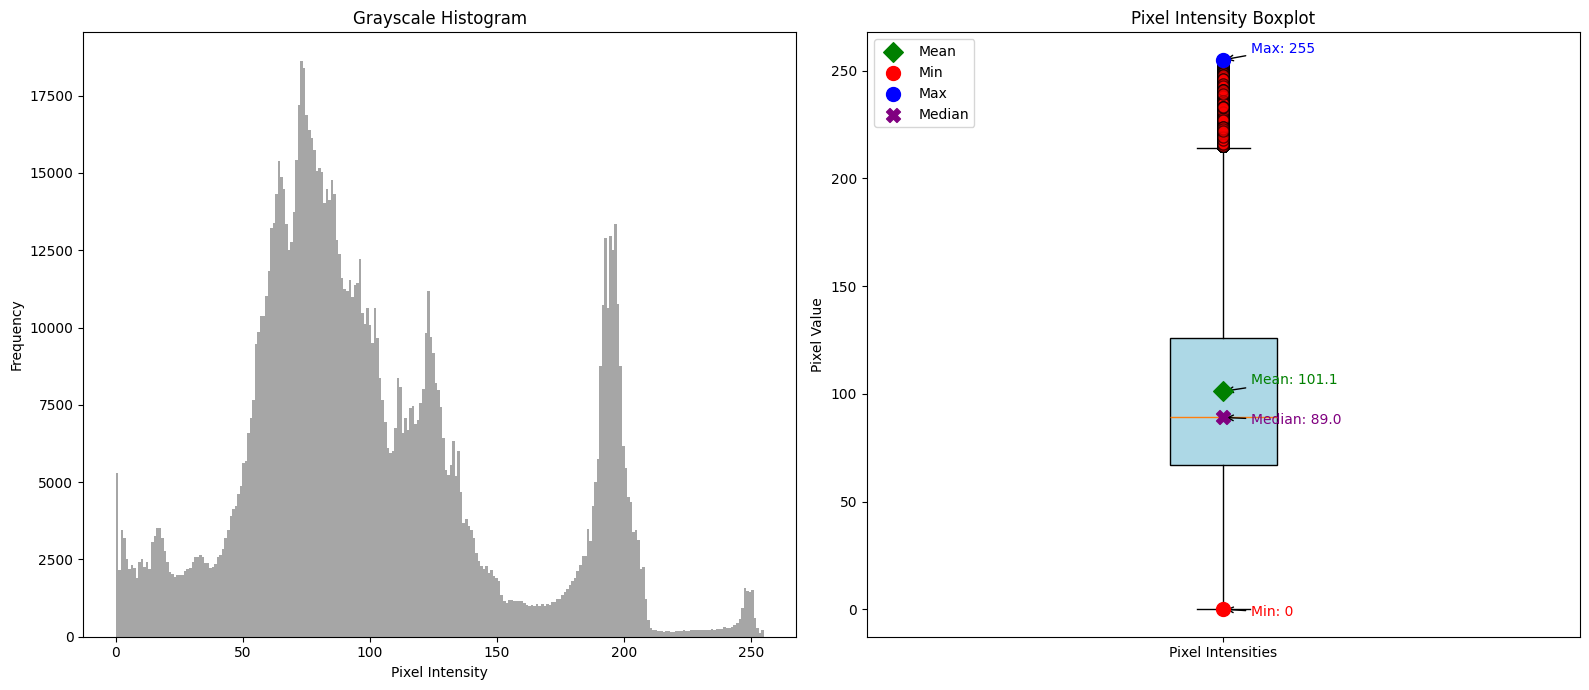

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('dataset/test/images/190001.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found!")

# Flatten pixels to 1D array
pixel_values = img.flatten()

# Calculate statistics
mean_val = np.mean(pixel_values)
min_val = np.min(pixel_values)
max_val = np.max(pixel_values)
median_val = np.median(pixel_values)
q1 = np.percentile(pixel_values, 25)
q3 = np.percentile(pixel_values, 75)

# Print summary
print(f"Mean: {mean_val:.2f}, Min: {min_val}, Max: {max_val}")
print(f"Median: {median_val}, Q1: {q1}, Q3: {q3}")

plt.figure(figsize=(16, 7))

# Histogram subplot
plt.subplot(1, 2, 1)
plt.title("Grayscale Histogram")
plt.hist(pixel_values, bins=256, color='gray', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Boxplot subplot with customized outliers (fliers)
plt.subplot(1, 2, 2)
plt.title("Pixel Intensity Boxplot")

box = plt.boxplot(pixel_values,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightblue'),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none', alpha=0.6))

# Mark and label key statistics
plt.scatter(1, mean_val, color='green', label='Mean', zorder=5, s=100, marker='D')
plt.scatter(1, min_val, color='red', label='Min', zorder=5, s=100, marker='o')
plt.scatter(1, max_val, color='blue', label='Max', zorder=5, s=100, marker='o')
plt.scatter(1, median_val, color='purple', label='Median', zorder=5, s=100, marker='X')

# Annotate statistics
offset = 5
plt.annotate(f"Mean: {mean_val:.1f}", (1, mean_val), xytext=(20, offset), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), color='green', fontsize=10)
plt.annotate(f"Min: {min_val}", (1, min_val), xytext=(20, -offset), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), color='red', fontsize=10)
plt.annotate(f"Max: {max_val}", (1, max_val), xytext=(20, offset), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), color='blue', fontsize=10)
plt.annotate(f"Median: {median_val}", (1, median_val), xytext=(20, -offset), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), color='purple', fontsize=10)

# Final touches
plt.xticks([1], ['Pixel Intensities'])
plt.ylabel('Pixel Value')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import cv2

img_path = 'dataset/test/images/190001.jpg'  # Adjust path accordingly
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    raise ValueError("Image not found or path is incorrect!")
def create_mask_from_yolo(img_shape, label_path):
    height, width = img_shape[:2]
    mask = np.zeros((height, width), dtype=np.uint8)
    
    with open(label_path, 'r') as file:
        for line in file:
            cls, x_center, y_center, w, h = map(float, line.strip().split())
            
            x_center, y_center = x_center * width, y_center * height
            w, h = w * width, h * height
            
            x1 = max(0, int(x_center - w/2))
            y1 = max(0, int(y_center - h/2))
            x2 = min(width-1, int(x_center + w/2))
            y2 = min(height-1, int(y_center + h/2))
            
            if x2 > x1 and y2 > y1:
                cv2.rectangle(mask, (x1, y1), (x2, y2), 255, thickness=-1)
    
    return mask
human_pixels = img[mask == 255]
non_human_pixels = img[mask == 0]
import numpy as np

print("Human region stats:")
print("Mean intensity:", np.mean(human_pixels))
print("Min intensity:", np.min(human_pixels))
print("Max intensity:", np.max(human_pixels))

print("\nNon-human region stats:")
print("Mean intensity:", np.mean(non_human_pixels))
print("Min intensity:", np.min(non_human_pixels))
print("Max intensity:", np.max(non_human_pixels))

NameError: name 'mask' is not defined

Mean: 101.14, Min: 0, Max: 255
Median: 89.0, Q1: 67.0, Q3: 126.0


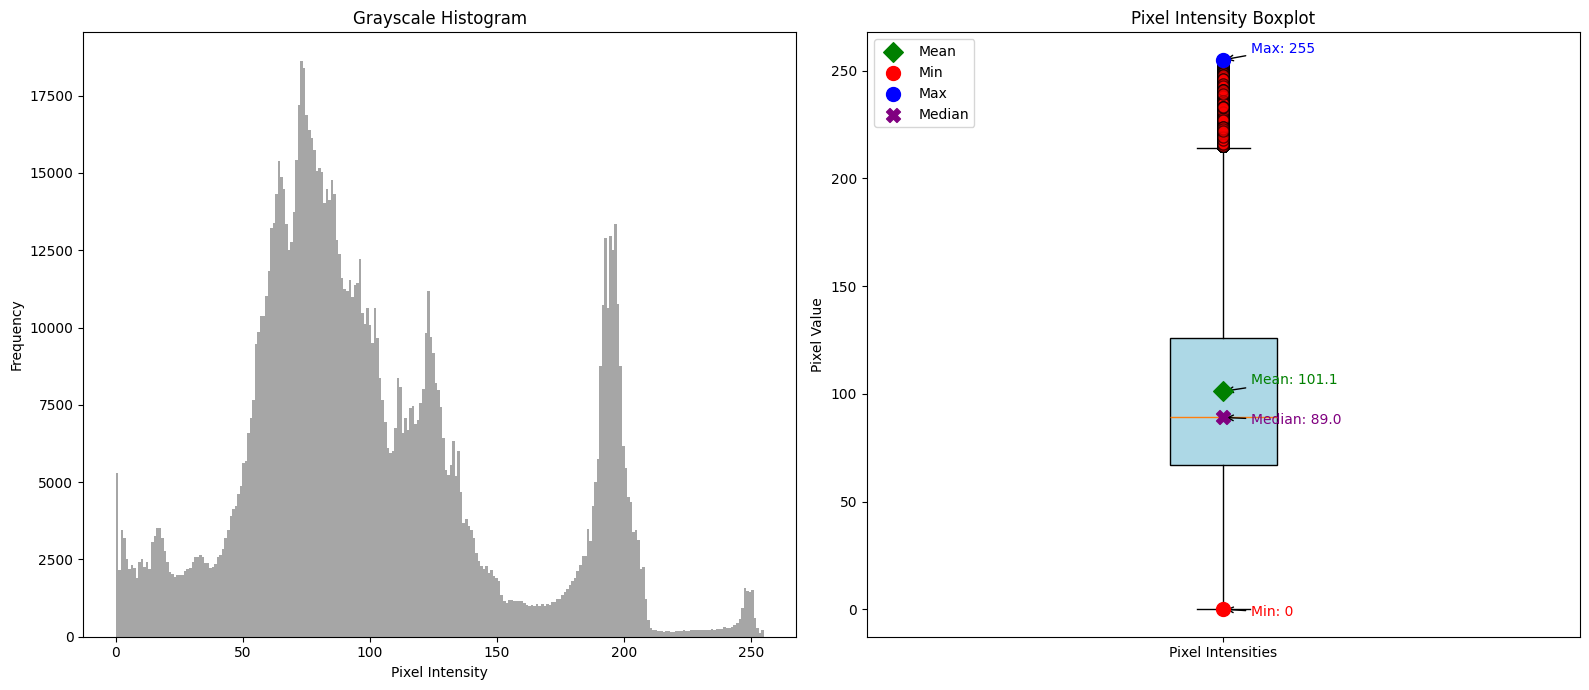

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
img = cv2.imread('dataset/test/images/190001.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found!")

# Flatten pixels to 1D array
pixel_values = img.flatten()

# Calculate statistics
mean_val = np.mean(pixel_values)
min_val = np.min(pixel_values)
max_val = np.max(pixel_values)
median_val = np.median(pixel_values)
q1 = np.percentile(pixel_values, 25)
q3 = np.percentile(pixel_values, 75)

# Print summary
print(f"Mean: {mean_val:.2f}, Min: {min_val}, Max: {max_val}")
print(f"Median: {median_val}, Q1: {q1}, Q3: {q3}")

plt.figure(figsize=(16, 7))

# Histogram subplot
plt.subplot(1, 2, 1)
plt.title("Grayscale Histogram")
plt.hist(pixel_values, bins=256, color='gray', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

# Boxplot subplot with customized outliers (fliers)
plt.subplot(1, 2, 2)
plt.title("Pixel Intensity Boxplot")

box = plt.boxplot(pixel_values,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightblue'),
                  flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none', alpha=0.6))

# Mark and label key statistics
plt.scatter(1, mean_val, color='green', label='Mean', zorder=5, s=100, marker='D')
plt.scatter(1, min_val, color='red', label='Min', zorder=5, s=100, marker='o')
plt.scatter(1, max_val, color='blue', label='Max', zorder=5, s=100, marker='o')
plt.scatter(1, median_val, color='purple', label='Median', zorder=5, s=100, marker='X')

# Annotate statistics
offset = 5
plt.annotate(f"Mean: {mean_val:.1f}", (1, mean_val), xytext=(20, offset), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), color='green', fontsize=10)
plt.annotate(f"Min: {min_val}", (1, min_val), xytext=(20, -offset), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), color='red', fontsize=10)
plt.annotate(f"Max: {max_val}", (1, max_val), xytext=(20, offset), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), color='blue', fontsize=10)
plt.annotate(f"Median: {median_val}", (1, median_val), xytext=(20, -offset), textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), color='purple', fontsize=10)

# Final touches
plt.xticks([1], ['Pixel Intensities'])
plt.ylabel('Pixel Value')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()